In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
voter_2020 = pd.read_csv('files/november2020_voterData.csv')
gov_2020 = pd.read_csv('files/2020govwrace.csv')
gov_2020 = gov_2020.drop(gov_2020.columns[0], axis=1)
pre_2020 = pd.read_csv('files/2020preswrace.csv')
pre_2020 = pre_2020.drop(pre_2020.columns[0], axis=1)

voter_2020 = voter_2020.drop(voter_2020.columns[0], axis=1)
voter_2020.head()


,county_desc,election_date,party_cd,race_code,ethnic_code,sex_code,age,total_voters
0,IREDELL,11/03/2020,DEM,Undesignated,HL,M,41-65,1
1,GUILFORD,11/03/2020,LIB,White,NL,M,18-25,1
2,WAKE,11/03/2020,REP,White,UN,F,41-65,12
3,MOORE,11/03/2020,UNA,Undesignated,UN,U,26-40,6
4,WAKE,11/03/2020,UNA,Asian,NL,F,26-40,8


In [4]:
#A bit more data cleaning 2020 voter data
'''
voter_2020 = pd.read_csv('files/november2020_voterData.csv', header=0)
voter_2020 = voter_2020.drop(["vtd_abbrv","stats_type", "update_date", 'precinct_abbrv', 'Unnamed: 0'], axis = 1)
voter_2020 = voter_2020.replace('Age 18 - 25', '18-25')
voter_2020 = voter_2020.replace('Age 26 - 40', '26-40')
voter_2020 = voter_2020.replace('Age 41 - 65', '41-65')
voter_2020 = voter_2020.replace('Age Over 66', '66+')
voter_2020 = voter_2020[voter_2020["age"] != "Age < 18 Or Invalid Birth Dates"]
voter_2020 = voter_2020.drop([0])
voter_2020.head()
voter_2020.to_csv('november2020_voterData.csv')
'''

'\nvoter_2020 = pd.read_csv(\'files/november2020_voterData.csv\', header=0)\nvoter_2020 = voter_2020.drop(["vtd_abbrv","stats_type", "update_date", \'precinct_abbrv\', \'Unnamed: 0\'], axis = 1)\nvoter_2020 = voter_2020.replace(\'Age 18 - 25\', \'18-25\')\nvoter_2020 = voter_2020.replace(\'Age 26 - 40\', \'26-40\')\nvoter_2020 = voter_2020.replace(\'Age 41 - 65\', \'41-65\')\nvoter_2020 = voter_2020.replace(\'Age Over 66\', \'66+\')\nvoter_2020 = voter_2020[voter_2020["age"] != "Age < 18 Or Invalid Birth Dates"]\nvoter_2020 = voter_2020.drop([0])\nvoter_2020.head()\nvoter_2020.to_csv(\'november2020_voterData.csv\')\n'

In [ ]:
#a bit more cleaning 2016 voter data, to come


In [11]:
#Cleaning for Predictions, voter_demographics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
"""print(set(voter_2020['sex_code']))
print(set(voter_2020['ethnic_code']))
print(set(voter_2020['race_code']))
print(set(voter_2020['age']))
print(set(voter_2020['party_cd']))
print(set(voter_2020['election_date']))"""
voter_2020 = voter_2020[(voter_2020['sex_code'] != 'U') &
(voter_2020['race_code'] != 'Undesignated') & (voter_2020['age'] != 'Invalid Birth Dates') & 
(voter_2020['party_cd'] != 'UNA')]
voter_2020 = voter_2020.dropna(subset=['race_code'])
#print(len(voter_2020))

print(set(voter_2020['race_code']))

data = OneHotEncoder().fit_transform(voter_2020[['sex_code', 'county_desc', 'age', 'party_cd']].values).toarray()
target = voter_2020['race_code']



{'Black', 'White', 'Indian American', 'Biracial', 'Other', 'Asian'}


In [12]:
# predicting county by sex, race, party, age
#test_split
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)



0.4209015812597437


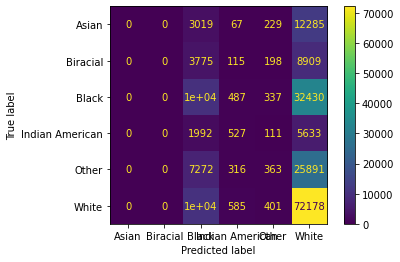

In [13]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [14]:
gov_votes = pd.read_csv('files/2020gov_county_votes.csv')
gov_votes = gov_votes.drop(gov_votes.columns[0], axis=1)
voter_2020_rename = voter_2020.rename(columns={"county_desc": "County"})
gov_votes = gov_votes.set_index('County').join(voter_2020_rename.set_index('County'))
data = OneHotEncoder().fit_transform(gov_votes[['sex_code', 'race_code', 'age', 'party_cd']].values).toarray()
target = gov_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)


0.5599046384968921


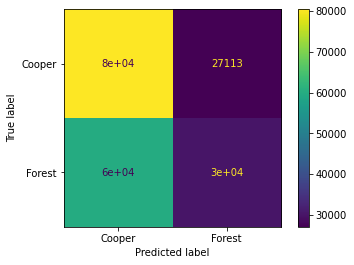

In [15]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [16]:
pres_votes = pd.read_csv('files/2020pres_county_votes.csv')
pres_votes = pres_votes.drop(pres_votes.columns[0], axis=1)
pres_votes = pres_votes.set_index('County').join(voter_2020_rename.set_index('County'))
data = OneHotEncoder().fit_transform(pres_votes[['sex_code', 'race_code', 'age', 'party_cd']].values).toarray()
target = pres_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)


0.5549189123524528


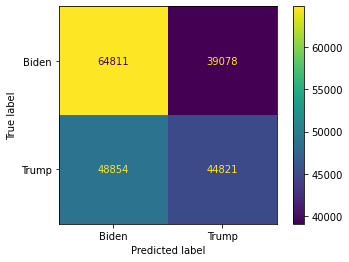

In [17]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [21]:
gov_votes['County'] = gov_votes.index
gov_votes_county_result = gov_votes[['County', 'election_winner']]
gov_votes_county_result = gov_votes_county_result.rename(columns={'election_winner': 'gov_winner'})
gov_votes_county_result.head()

,County,gov_winner
County,,
ALAMANCE,ALAMANCE,Forest
ALAMANCE,ALAMANCE,Forest
ALAMANCE,ALAMANCE,Forest
ALAMANCE,ALAMANCE,Forest
ALAMANCE,ALAMANCE,Forest


In [23]:
gov_votes_county_result = gov_votes_county_result.drop_duplicates()
gov_votes_county_result
county_dict = {}
for x,y in zip(gov_votes_county_result['County'], gov_votes_county_result['gov_winner']):
    county_dict[x] = y



{'ALAMANCE': 'Forest',
 'ALEXANDER': 'Forest',
 'ALLEGHANY': 'Forest',
 'ANSON': 'Cooper',
 'ASHE': 'Forest',
 'AVERY': 'Forest',
 'BEAUFORT': 'Forest',
 'BERTIE': 'Cooper',
 'BLADEN': 'Forest',
 'BRUNSWICK': 'Forest',
 'BUNCOMBE': 'Cooper',
 'BURKE': 'Forest',
 'CABARRUS': 'Forest',
 'CALDWELL': 'Forest',
 'CAMDEN': 'Forest',
 'CARTERET': 'Forest',
 'CASWELL': 'Forest',
 'CATAWBA': 'Forest',
 'CHATHAM': 'Cooper',
 'CHEROKEE': 'Forest',
 'CHOWAN': 'Forest',
 'CLAY': 'Forest',
 'CLEVELAND': 'Forest',
 'COLUMBUS': 'Forest',
 'CRAVEN': 'Forest',
 'CUMBERLAND': 'Cooper',
 'CURRITUCK': 'Forest',
 'DARE': 'Forest',
 'DAVIDSON': 'Forest',
 'DAVIE': 'Forest',
 'DUPLIN': 'Forest',
 'DURHAM': 'Cooper',
 'EDGECOMBE': 'Cooper',
 'FORSYTH': 'Cooper',
 'FRANKLIN': 'Forest',
 'GASTON': 'Forest',
 'GATES': 'Forest',
 'GRAHAM': 'Forest',
 'GRANVILLE': 'Cooper',
 'GREENE': 'Forest',
 'GUILFORD': 'Cooper',
 'HALIFAX': 'Cooper',
 'HARNETT': 'Forest',
 'HAYWOOD': 'Forest',
 'HENDERSON': 'Forest',
 'HERTFOR

In [25]:
gov_winner = []
for x in pres_votes.index:
    gov_winner.append(county_dict[x])

In [31]:
pres_votes['gov_winner'] = gov_winner
data = OneHotEncoder().fit_transform(pres_votes[['sex_code', 'race_code', 'party_cd', 'gov_winner']].values).toarray()
target = pres_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)

0.9814996659310401


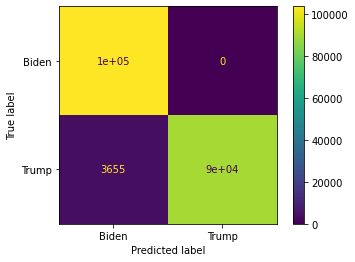

In [32]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [33]:
tres_county_results = pd.read_csv('files/2020tres_county_votes.csv')
tres_county_results = tres_county_results.drop_duplicates()
county_dict = {}
for x,y in zip(tres_county_results['County'], tres_county_results['election_winner']):
    county_dict[x] = y
county_dict

{'ALAMANCE': 'Folwell',
 'ALEXANDER': 'Folwell',
 'ALLEGHANY': 'Folwell',
 'ANSON': 'Chatterji',
 'ASHE': 'Folwell',
 'AVERY': 'Folwell',
 'BEAUFORT': 'Folwell',
 'BERTIE': 'Chatterji',
 'BLADEN': 'Folwell',
 'BRUNSWICK': 'Folwell',
 'BUNCOMBE': 'Chatterji',
 'BURKE': 'Folwell',
 'CABARRUS': 'Folwell',
 'CALDWELL': 'Folwell',
 'CAMDEN': 'Folwell',
 'CARTERET': 'Folwell',
 'CASWELL': 'Folwell',
 'CATAWBA': 'Folwell',
 'CHATHAM': 'Chatterji',
 'CHEROKEE': 'Folwell',
 'CHOWAN': 'Folwell',
 'CLAY': 'Folwell',
 'CLEVELAND': 'Folwell',
 'COLUMBUS': 'Folwell',
 'CRAVEN': 'Folwell',
 'CUMBERLAND': 'Chatterji',
 'CURRITUCK': 'Folwell',
 'DARE': 'Folwell',
 'DAVIDSON': 'Folwell',
 'DAVIE': 'Folwell',
 'DUPLIN': 'Folwell',
 'DURHAM': 'Chatterji',
 'EDGECOMBE': 'Chatterji',
 'FORSYTH': 'Chatterji',
 'FRANKLIN': 'Folwell',
 'GASTON': 'Folwell',
 'GATES': 'Folwell',
 'GRAHAM': 'Folwell',
 'GRANVILLE': 'Folwell',
 'GREENE': 'Folwell',
 'GUILFORD': 'Chatterji',
 'HALIFAX': 'Chatterji',
 'HARNETT': 'Fo

In [35]:
tres_winner = []
for x in pres_votes.index:
    tres_winner.append(county_dict[x])

In [44]:
pres_votes['tres_winner'] = tres_winner
data = OneHotEncoder().fit_transform(pres_votes[['sex_code', 'race_code', 'party_cd', 'tres_winner']].values).toarray()
target = pres_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)

0.9672713652284829


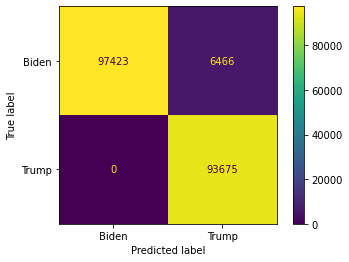

In [45]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [55]:
state_senate = pd.read_csv('files/2020state_senate_county_votes.csv')
state_senate = state_senate
county_dict = {}
for x,y in zip(state_senate['County'], state_senate['winner_party']):
    county_dict[x] = y
county_dict

{'ALAMANCE': 'REP',
 'ALEXANDER': 'REP',
 'ALLEGHANY': 'REP',
 'ANSON': 'DEM',
 'ASHE': 'REP',
 'AVERY': 'REP',
 'BEAUFORT': 'REP',
 'BERTIE': 'DEM',
 'BLADEN': 'REP',
 'BRUNSWICK': 'REP',
 'BUNCOMBE': 'DEM',
 'BURKE': 'REP',
 'CABARRUS': 'REP',
 'CALDWELL': 'REP',
 'CAMDEN': 'REP',
 'CARTERET': 'REP',
 'CASWELL': 'REP',
 'CATAWBA': 'REP',
 'CHATHAM': 'DEM',
 'CHEROKEE': 'REP',
 'CHOWAN': 'REP',
 'CLAY': 'REP',
 'CLEVELAND': 'REP',
 'COLUMBUS': 'REP',
 'CRAVEN': 'REP',
 'CUMBERLAND': 'DEM',
 'CURRITUCK': 'REP',
 'DARE': 'REP',
 'DAVIDSON': 'REP',
 'DAVIE': 'REP',
 'DUPLIN': 'REP',
 'DURHAM': 'DEM',
 'EDGECOMBE': 'DEM',
 'FORSYTH': 'DEM',
 'FRANKLIN': 'REP',
 'GASTON': 'REP',
 'GATES': 'REP',
 'GRAHAM': 'REP',
 'GRANVILLE': 'REP',
 'GREENE': 'DEM',
 'GUILFORD': 'DEM',
 'HALIFAX': 'DEM',
 'HARNETT': 'REP',
 'HAYWOOD': 'REP',
 'HENDERSON': 'REP',
 'HERTFORD': 'DEM',
 'HOKE': 'DEM',
 'HYDE': 'REP',
 'IREDELL': 'REP',
 'JACKSON': 'REP',
 'JOHNSTON': 'REP',
 'JONES': 'REP',
 'LEE': 'REP',
 '

In [57]:
winner_party = []
for x in pres_votes.index:
    winner_party.append(county_dict[x])


In [69]:
pres_votes['state_sen_winner_party'] = winner_party
data = OneHotEncoder().fit_transform(pres_votes[['sex_code', 'race_code', 'party_cd','state_sen_winner_party']].values).toarray()
target = pres_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)

0.9689113401226944


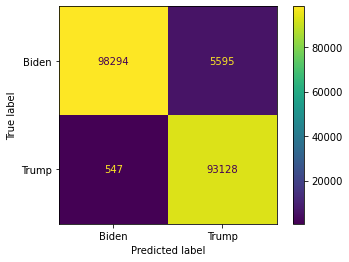

In [70]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)